<a href="https://colab.research.google.com/github/UN-GCPDS/python-gcpds.localbiplot/blob/main/docs/source/notebooks/01-module%20example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing our Local Biplot Library

In [1]:
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.localbiplot.git --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.5 MB/s eta 0:00:00


## Agregando todolo necesario para ejecutar nuestro codigo

Agregamos la librerias necesarias como numpy, pandas  y scikit learn.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib as mpl



from sklearn.preprocessing import StandardScaler, MinMaxScaler

Una vez  descargada la libreria procedemos a utilizarla dentro de nuestro codigo.


In [3]:
import gcpds.localbiplot as lb


# **Local Biplot Examples**

In [4]:
!pip install datashader bokeh holoviews   --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 8.4 MB/s eta 0:00:00


In [5]:
from sklearn.datasets import make_swiss_roll
#se ilustra nuevamente sobre swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


## Uniform Manifold Approximation and Projection (UMAP) Fundamentals

![gifumap](https://umap-learn.readthedocs.io/en/latest/_images/aligned_umap_pendigits_anim.gif)

- UMAP is a dimensionality reduction technique that models high-dimensional space as a fuzzy topological structure and optimizes it in low-dimensional space, preserving both global and local distances.

- UMAP constructs a weighted graph to represent the fuzzy topological structure.

- The probability $p_{nn'}$  representing the weight of the edge between $\mathbf{x}_n$ and $\mathbf{x}_{n'}$ is given by:

\begin{equation}
p_{nn'} = \exp\left(-\frac{\|\mathbf{x}_n - \mathbf{x}_{n'}\| - \rho_n}{\sigma_n}\right),
\end{equation}

- $\rho_n$  is the distance to the nearest neighbor of $\mathbf{x}_n$, ensuring that local distances are not affected by noise.

- $\sigma_n$ is determined by a fixed number of neighbors.

- The fuzzy relationship becomes symmetric as:

\begin{equation}
\tilde{p}_{nn'} = p_{nn'} + p_{n'n} - p_{nn'} p_{n'n}.
\end{equation}



- The relationships in the low-dimensional space are fixed using a heavy-tailed t-distribution:

\begin{equation}
q_{nn'} = \left(1 + a \|\mathbf{z}_n - \mathbf{z}_{n'}\|^{2b}\right)^{-1},
\end{equation}

With $a$ and $b$ as the parameters of the distribution. These are generally set to 1.

- UMAP minimizes the cross-entropy:

\begin{equation}
C(P;Q) = \sum_{n \neq n'} \left( -\tilde{p}_{nn'} \log(q_{nn'}) - (1 - \tilde{p}_{nn'}) \log(1 - q_{nn'}) \right).
\end{equation}

- Conventionally, gradient-based methods are used to solve the optimization.

In [6]:
import umap
import umap.plot

In [7]:
red = umap.UMAP(n_components=2,n_neighbors=40, min_dist=0.2)
X_reduced_umap = red.fit_transform(X)

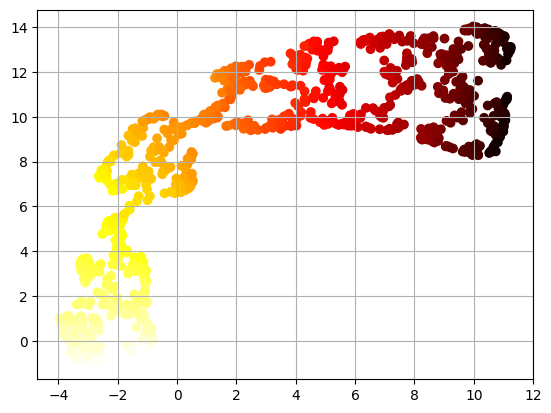

In [8]:
plt.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


- UMAP presenta una serie de métodos para [gráficos interactivos](https://umap-learn.readthedocs.io/en/latest/plotting.html)

<Axes: >

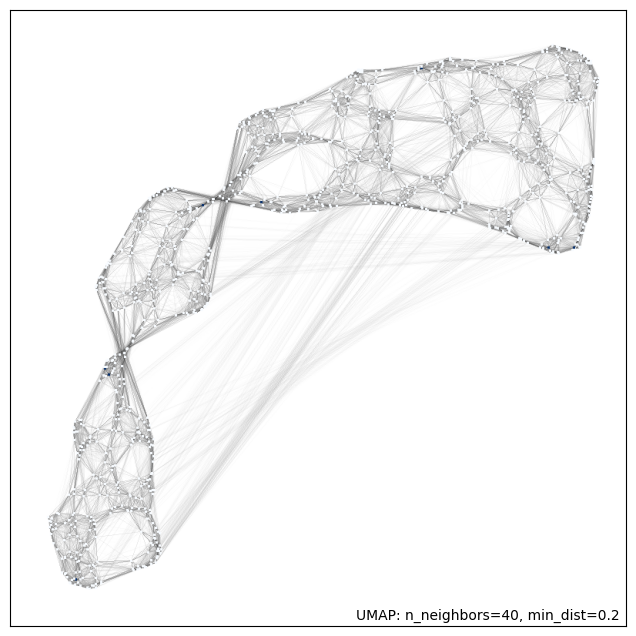

In [9]:
umap.plot.connectivity(red, show_points=True)

<Axes: >

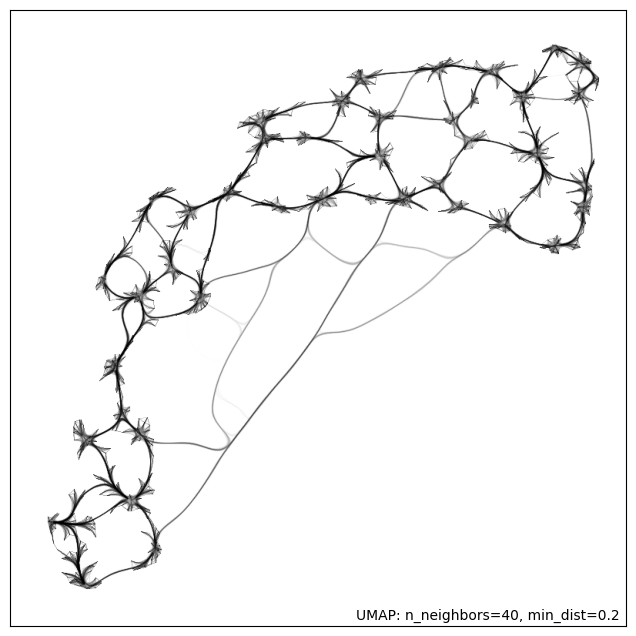

In [10]:
umap.plot.connectivity(red, edge_bundling='hammer')

# **Multivariate Gaussians**

We create a  data matrix $\mathbf{X} \in ℝ^{N \times P}$  by creating three clouds of 500 samples and 5 features each, following a multi normal or Gaussian distribution whose mean and covariance matrix are previously defined. The covariance matrix must be positive semi definite.

In [11]:



def generate_samples(mean, covariance, num_samples=500, standardize=True):
        """
        Generate random samples based on mean and covariance.

        Parameters:
        - mean: list | np.ndarray
          1-D array_like, of length N. Mean of the N-dimensional distribution.

        - covariance: list | np.ndarray
          2-D array_like, of shape (N, N)
          Covariance matrix of the distribution. It must be symmetric and positive-semidefinite for proper sampling.
        - num_samples: int | tuple of ints
        - standardize: Whether to standardize the generated samples. Default is True.

        Returns: list | np.ndarray
        - samples:
          Drawn samples, of shape size, if that was provided. If not, the shape is (N,)
        Generated samples.
        """

        np.random.seed(123)
        samples = np.random.default_rng(seed=123).multivariate_normal(mean, covariance, num_samples)

        if standardize:
            scaler = MinMaxScaler()
            samples = scaler.fit_transform(samples)

        return samples






## Sample Generation:

For each cluster, the `generate_samples()` function is used to generate `n_samples` from a multivariate normal distribution, defined by the corresponding mean and covariance for that cluster. The resulting data is stored in the `data` array.

In [12]:
# Parameters
n_samples = 500
n_features = 5
n_clusters = 3

np.random.seed(123)

# Initialize empty array for the data
data = np.zeros((n_samples * n_clusters, n_features))


mean_5 = [[0.1, 0.05, 22.2, 92.4, 102],
         [12.3,  23.8,  12.2, 14.4, 10],
         [-12.3, 15.8, 9.2, -9.4, 9],]


covariance_5 = [[[3.    , 2.45  , 0.84  , 0.12  , 0.68  ],
                [2.45  , 2.25  , 0.    , 0.162 , 0.102 ],
                [0.84  , 0.    , 1.    , 0.36  , 0.034 ],
                [0.12  , 0.162 , 0.36  , 1.44  , 0.0816],
                [0.68  , 0.102 , 0.034 , 0.0816, 2.89  ]],


                  [[7.0, -5, 2, -5.2, -0.1],
                  [-5,  3.5, -0.4, -0.3, -0.2],
                  [2, -0.4, 3.0, -0.2, -0.1],
                  [-5.2, -0.3, -0.2, 5.0, -0.1],
                  [-0.1, -0.2, -0.1, -0.1, 8.0]],


                [[8.,    0.2   , -1.6   , -2.352 , -3.0 ],
                [0.2,   2.25  , 1.2   , 1.62  , 2.295 ],
                [-1.6,    1.2   , 6.    , 0.84  , 1.564 ],
                [-2.352,  -1.62  , 0.84  , 4.44  , 2.0],
                [-3.0 , 2.295 , -1.564 , 2.0, 3.89  ]]]



# Define mean and covariance for each cluster
for i in range(n_clusters):

    cluster_data =  generate_samples(mean_5[i], covariance_5[i], standardize=False)
    #print(np.cov(cluster_data.T) )
    data[i * n_samples:(i + 1) * n_samples, :] = cluster_data



## Target Variable Generation:
A target variable `ydata` is created to label the samples by their respective clusters. It assigns a unique label (0, 1, or 2) to the samples based on which cluster they belong to.

In [13]:
#target variable generation
class_synth = 3
nc = 500
ydata = np.empty(shape=[nc*class_synth],dtype=np.int8)
for i in range(class_synth):
  ydata[i*nc :(i+1)*nc] = i

Convert the generated data into a DataFrame with feature columns 'f1' to 'f5'

In [14]:
#convertir datos a Dataframe
Xdata = pd.DataFrame(data, columns=['f1', 'f2','f3', 'f4', 'f5' ])

print(Xdata.shape, ydata.shape)

(1500, 5) (1500,)



## Instantiating the Local Biplot Class

We instantiate the `LocalBiplot` class, which will be used to perform both global and local biplot analyses. The class is configured with an affine transformation (rotation) and UMAP as the dimensionality reduction method.


In [15]:
localbiplot = lb.LocalBiplot(affine_='rotation',redm='umap')


## Global Biplot Analysis using PCA

The global biplot is generated using PCA (Principal Component Analysis). It projects the data into a 2D plane, showing relationships between features and the clusters in the dataset.

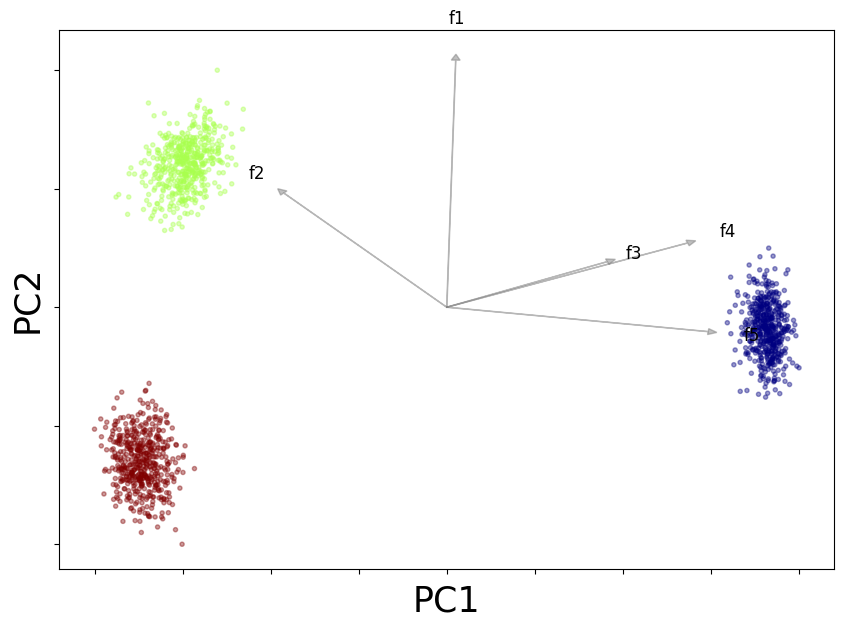

In [16]:
loading,rel_,score = localbiplot.biplot2D(Xdata,plot_=True,labels=ydata,loading_labels=Xdata.columns)


## Local Biplot Analysis using UMAP

Then, we perform a local biplot analysis using UMAP (Uniform Manifold Approximation and Projection).


Dimensionality Reduction...
Affine Transformation...
1/3
plot 1-th group
Saving figure synth_local_bip
2/3
plot 2-th group
Saving figure synth_local_bip
3/3
plot 3-th group
Saving figure synth_local_bip


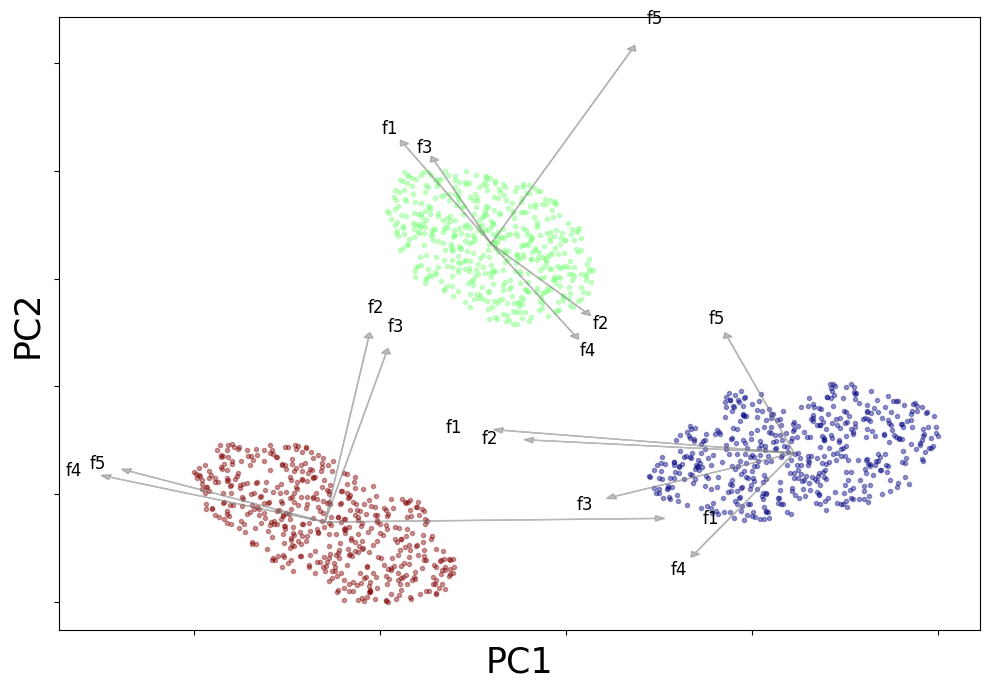

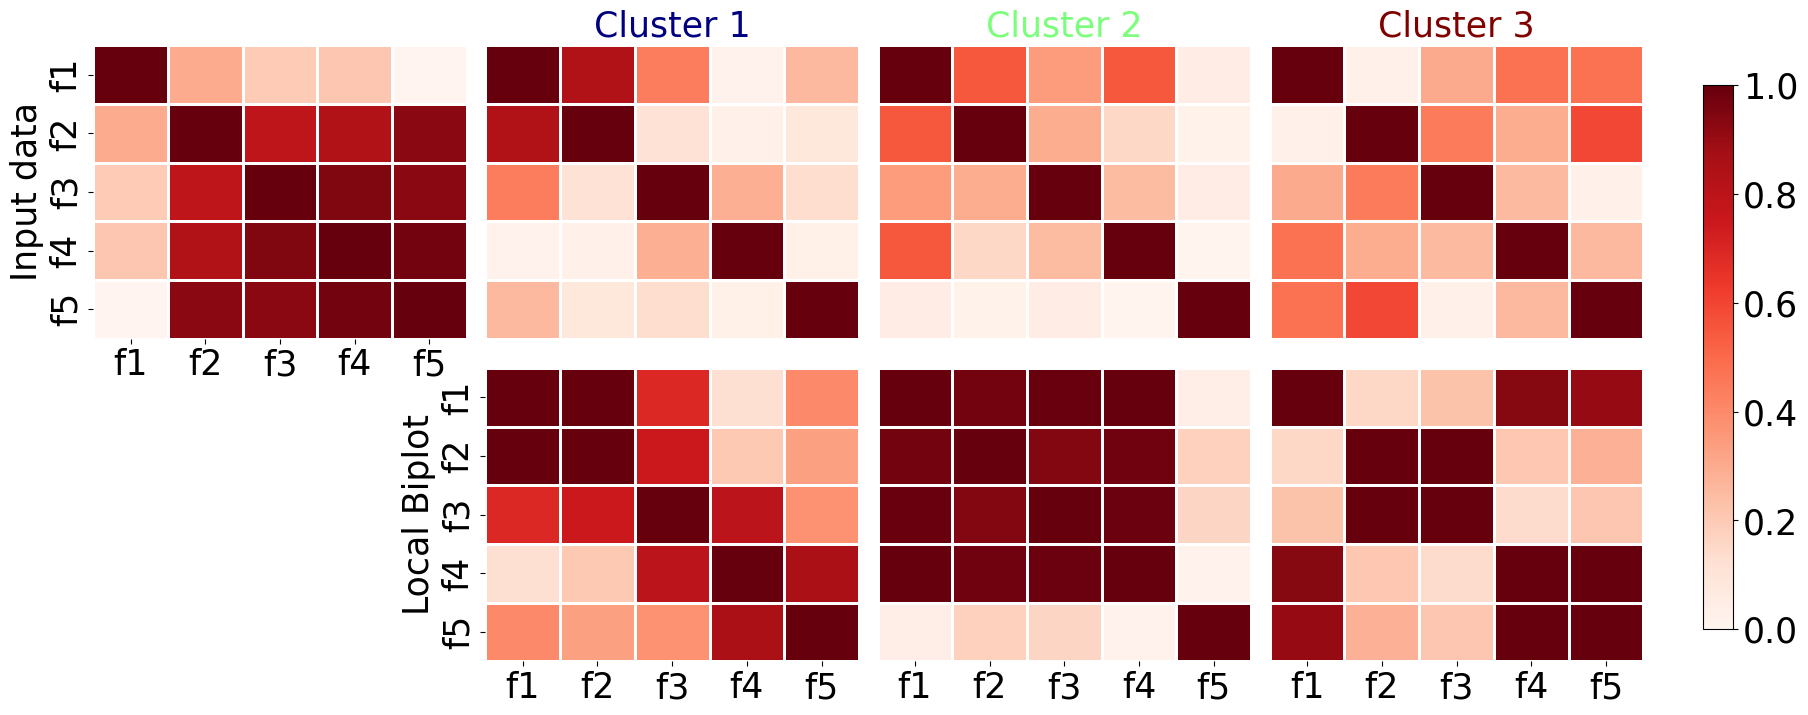

array([0, 0, 0, ..., 2, 2, 2], dtype=int8)

In [17]:
localbiplot.local_biplot2D(Xdata,y=ydata,plot_=True,loading_labels=Xdata.columns,  filename="synth_local_bip")

# **Forage Grasses Dataset**

* This database comprises 35 distinct VIs from five color spaces: RGB, CIE 1976 L*a*b*(CIELab), CIE 1976 L*u*v*(CIELuv), hue-saturation-value (HSV), and hue-saturation-lightness (HSL), for three categories of forage grass:
festuca arundinacea (Fa), diploid Lolium perenne (Lp2n), and tetraploid Lolium perenne (Lp4n).

* From the thermal data, Δ𝑇 and the crop water stress index (CWSI) were calculated.
* A breeder score is provided for three distinct dates designated as T2, T4, and T5. The score ranges from one to nine, based on both biomass quantity and the verdant hue of the plant.
* $𝑃=37$  features and $𝑁=3174$  samples are obtained.



## Download grass database

In [18]:
# Repository details
repo_url = "https://github.com/Jectrianama/Datasets_biplot.git"
repo_name = "Datasets_biplot"

# Check if the repository directory already exists
if not os.path.exists(repo_name):
    # Clone the repository if it doesn't exist (suppress verbose output)
    !git clone -l -s $repo_url > /dev/null 2>&1

# Unzip the dataset (suppress verbose output)
!unzip -o /content/Datasets_biplot/PhenotypingData.zip > /dev/null 2>&1

# Path to the CSV file
csv_path = '/content/PhenotypingData.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_path, sep=';')


## Rename and remove some dataframe columns

In [19]:
#data.info()
data.rename(columns={'FamKloon':'Famclone', 'Soort': 'Variety', 'GR_Rat':'G/R', 'Hue_val': 'H',
       'S_val' : 'S', 'V_val' : 'V', 'L_val' : 'L', 'a_val' : 'a*', 'b_val':'b*', 'I_val':'I' ,
       'G_R': 'G-R', 'G_B' : 'G-B', 'u_val': 'u*', 'v_val': 'v*'}, inplace=True)
data.drop(columns= ['Famclone', 'Code'	], inplace=True)#

In [20]:
# Suponiendo que Data_sel es un DataFrame de pandas
mapping = {

    130716: 1,
    130828: 2,
    130906: 3
}

data['Date'].replace(mapping, inplace=True)

replacing varieties 'Fa', 'Lp2n', 'Lp4n' for 1, 2, 3

In [21]:
data['Variety'].replace(['Fa', 'Lp2n', 'Lp4n'],
                        [1, 2, 3], inplace=True)


data = data.dropna().reset_index(drop=True)

data.loc[:,'CWSI'] += 0.0005 #esta columna tiene datos en ceros

In [22]:
data = data[['Date', 'Variety', 'Rkap',  'R', 'G', 'B', 'RCC', 'GCC', 'BCC','ExG', 'ExG2', 'ExR','ExGR', 'GRVI', 'GBVI', 'BRVI', 'G/R', 'G-R', 'G-B', 'VDVI', 'VARI', 'MGRVI', 'CIVE', 'VEG','WI', 'H', 'S', 'V', 'I',  'L', 'a*', 'b*', 'ab', 'NDLab', 'u*', 'v*','uv', 'NDLuv','dT', 'CWSI','Score']]

In [23]:

date= data['Date']

Xdata = data.iloc[:, 3:41].copy()

ydata = data['Score']



## Instantiating the Local Biplot Class

We instantiate the `LocalBiplot` class, which will be used to perform both global and local biplot analyses. The class is configured with an affine transformation (rotation) and UMAP as the dimensionality reduction method.


In [24]:
localbiplot = lb.LocalBiplot(affine_='rotation',redm='umap')

In [25]:
#loading,rel_,score = localbiplot.biplot2D(Xdata,plot_=True,labels=ydata,loading_labels=Xdata.columns, filename="grass_classic_bip")

## UMAP-Based Local Biplot

- We propose a method to extend the SVD-based biplot to explore local non-linear data relationships by mapping between linear and non-linear 2D spaces. First, a 2D low-dimensional space $\mathbf{Z}$ is computed using UMAP, followed by sample clustering. Then, local SVD is performed on each cluster, with an affine transformation applied for 2D visualization in the UMAP space. Instead of clustering original features, we cluster the latent feature space into $\tilde{R}$ disjoint sets, where each cluster is represented by its centroid $\boldsymbol{\mu}_r$.

- Then, the well-known K-means clustering algorithm is applied by solving:

\begin{equation}
\tilde{\mathbf{Z}}_r^* = \arg\min_{\boldsymbol{\mu}_r,\mathbf{Z}_r} \sum_{n=1}^N\sum_{r=1}^{\tilde{R}}\|\mathbf{z}_n-\boldsymbol{\mu}_r\|_2^2; \quad \text{s.t.} \quad \tilde{\mathbf{Z}}_r \cap \tilde{\mathbf{Z}}_{r'} = \emptyset, \quad \forall r,r'\in \tilde{R}, \quad r\neq r'.
\end{equation}

- For each cluster, a 2D SVD-based decomposition is performed: $\mathbf{X}_r = \tilde{\mathbf{U}}_r\tilde{\mathbf{S}}_r\tilde{\mathbf{V}}_r^\top$, where $\tilde{\mathbf{U}}_r$ and $\tilde{\mathbf{V}}_r$ represent the top two orthonormal bases, and $\tilde{\mathbf{S}}_r$ contains the singular values. The linear projection is: $\breve{\mathbf{Z}}_r = \mathbf{X}_r \mathbf{B}_r$, with $\mathbf{B}_r = \tilde{\mathbf{V}}_r\tilde{\mathbf{S}}_r^{0.5}$.

- Cluster-based affine transformations align non-linear UMAP embeddings and localized feature bases as: $\tilde{\mathbf{B}}_r = \gamma_r \mathbf{B}_r + \nu_r$, encoding rotation, dilation, and translation.


- The `local_biplot2D` method includes an optional parameter `corrplot_`, which is set to `True` by default. When enabled, it displays a correlation plot between all features, providing insight into how features are related to each other in the biplot. In this case, we have explicitly set `corrplot=False` to avoid displaying the correlation plot.  


Dimensionality Reduction...
Performing clustering...
(3174,) - [0 1 2 3]
Affine Transformation...
1/4
plot 1-th group
Saving figure grass_local_bip
2/4
plot 2-th group
Saving figure grass_local_bip
3/4
plot 3-th group
Saving figure grass_local_bip
4/4
plot 4-th group
Saving figure grass_local_bip


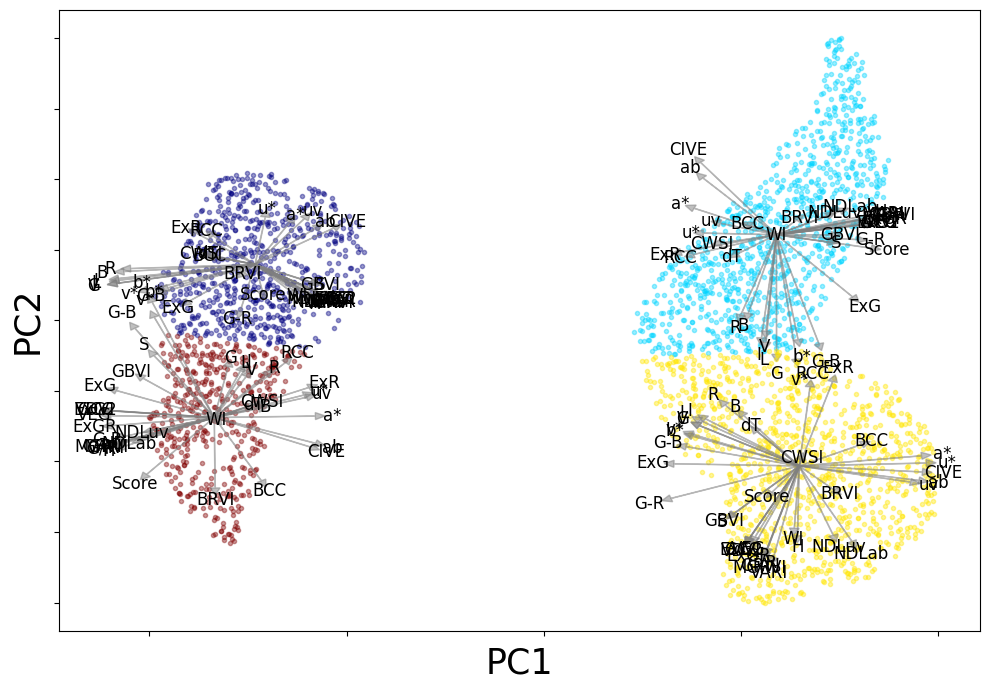

In [36]:
group = localbiplot.local_biplot2D(Xdata,y=4,plot_=True, corrplot_=False, loading_labels=Xdata.columns, filename="grass_local_bip")

## Local Biplot Normalized Feature Relevance

In [27]:
localbiplot.rel_l.shape
max_val = np.max(localbiplot.rel_l)
rel_ = localbiplot.rel_l/max_val
relev = pd.DataFrame(rel_.T, index=Xdata.columns)

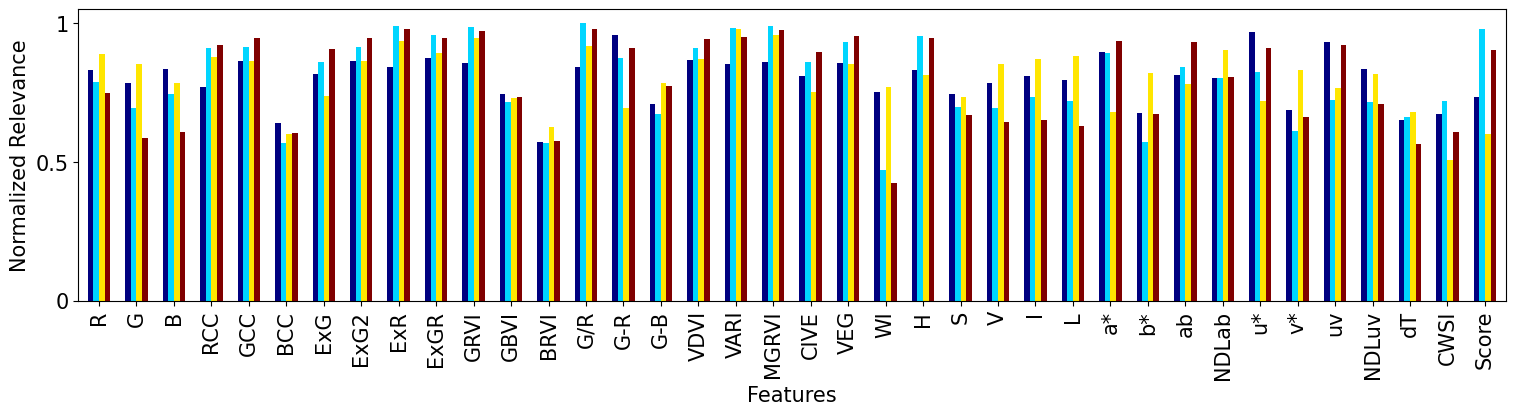

In [28]:
C_ = len(np.unique(group))
cmap_ = mpl.colormaps['jet'].resampled(4)
cmap_ = cmap_(range(4))

ax = relev.plot.bar(rot=90, figsize=(15,4), color=cmap_, fontsize = 15, legend=False,width=0.6)
ax.set_yticks([0, 0.5, 1], ['0', '0.5', '1'])
#ax.tick_params(labelbottom=False)
#ax.set_xticks([])
#ax.set_yticks([])
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.get_figure().tight_layout()
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Normalized Relevance', fontsize=15)

#ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), frameon=False)
# Save figure
ax.get_figure().savefig('plot.pdf', dpi=300)


## SVD-based Biplot Analysis using PCA

- Let $\mathbf{X} \in \mathbb{R}^{N \times P}$ be an input matrix with centered and standardized features. $\mathbf{X}$ is decomposed as $\mathbf{X} = \mathbf{U}\mathbf{S}\mathbf{V}^\top$, where $\mathbf{U} \in \mathbb{R}^{N \times M}$ and $\mathbf{V} \in \mathbb{R}^{P \times M}$ are orthonormal matrices, and $\mathbf{S} \in \mathbb{R}^{M \times M}$ is diagonal. This SVD yields a low-dimensional representation $\mathbf{\tilde{X}} = \mathbf{U}_M \mathbf{S}_M \mathbf{V}_M^\top$.

- The global biplot is generated using PCA (Principal Component Analysis). It projects the data into a 2D plane, showing relationships between features and the clusters in the dataset.

Saving figure grass_classic_bip


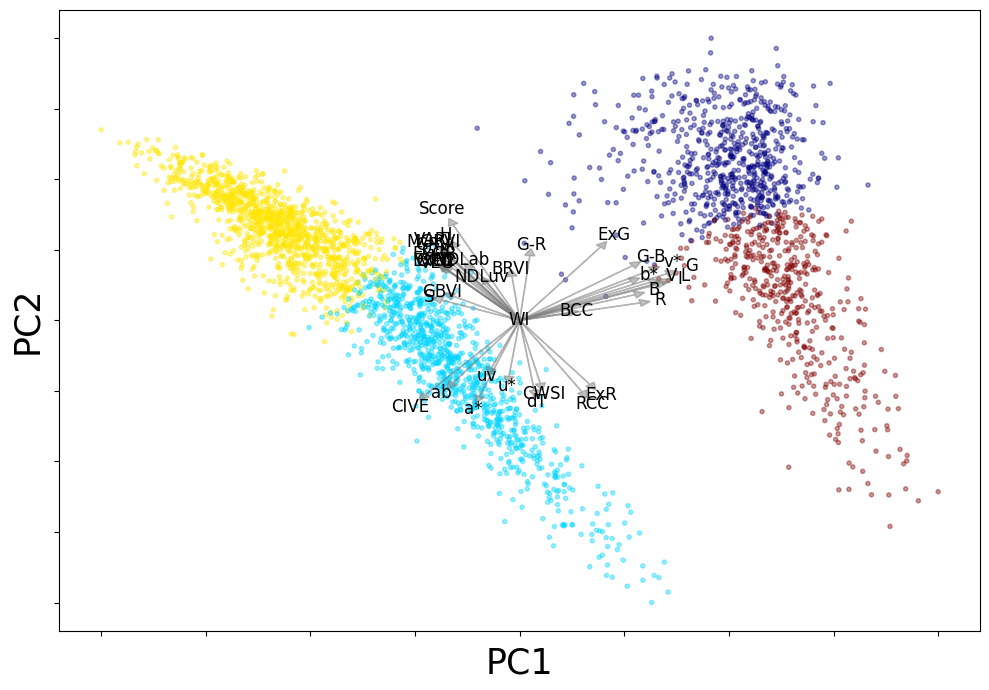

In [29]:
loading,rel_,score = localbiplot.biplot2D(Xdata,plot_=True,labels=group,loading_labels=Xdata.columns, filename="grass_classic_bip")

## SVD-based Biplot Normalized Feature Relevance


In [30]:
max_val = np.max(rel_)
rel_ = rel_/max_val
relev = pd.DataFrame(rel_.T, index=Xdata.columns)

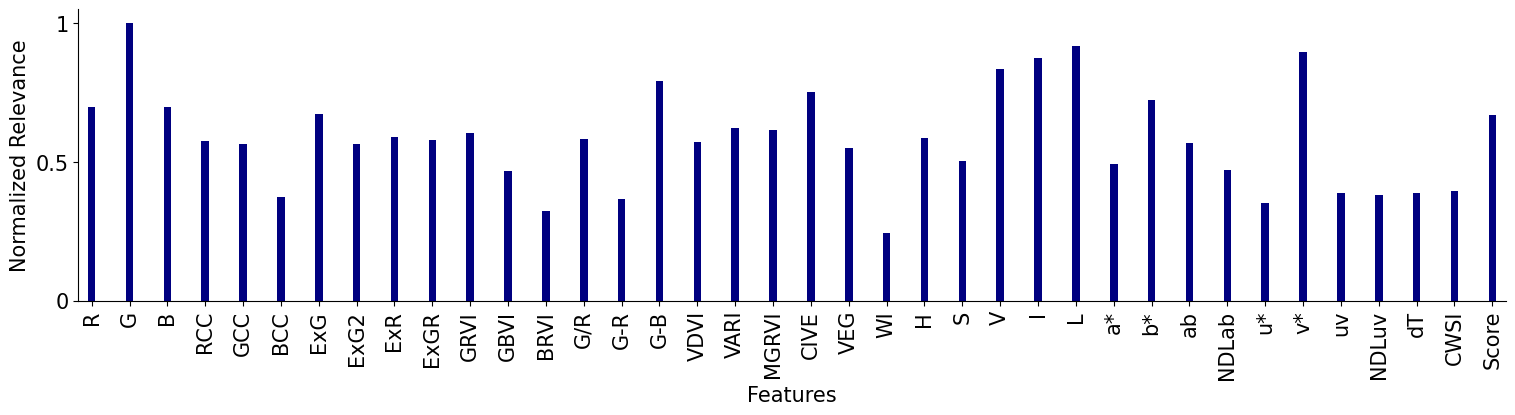

In [31]:
C_ = len(np.unique(group))
cmap_ = mpl.colormaps['jet'].resampled(4)
cmap_ = cmap_(range(4))
ax = relev.plot.bar(rot=90, figsize=(15,4), color=cmap_, fontsize = 15, legend=False, width=0.2)
ax.set_yticks([0, 0.5, 1], ['0', '0.5', '1'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_figure().tight_layout()
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Normalized Relevance', fontsize=15)

#ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), frameon=False)
# Save figure
ax.get_figure().savefig('PCA_importances_ALL.pdf', dpi=300)

 # KDE Estimation

 The 2D projection using the breeding score as color to provide further insights is given, while the flight dates (TF1, TF2, and TF3) determine the color of the curves.  The principal components in the projections have been scaled to a range between 0 and 1 for easier interpretation and visual comparison.



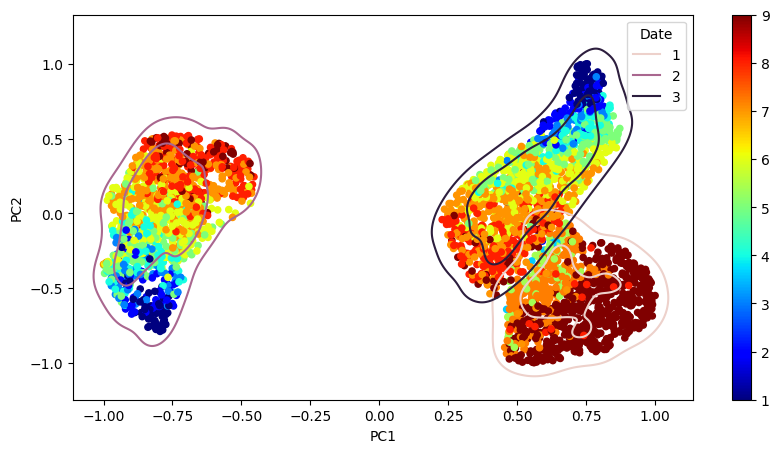

In [34]:
localbiplot.kdeplot_(data, hue_attr='Date', c_attr ='Score')

## Forage Grasses Pearson Correlation Results

- we compute the Pearson correlation ${\varrho_{pp'}}\in[-1,1]$ between features as follows:
\begin{equation}
\varrho_{pp'} = \frac{\langle\boldsymbol{\xi}_p - \bar{\xi}_p \mathbf{1},\boldsymbol{\xi}_{p'} - \bar{\xi}_{p'}\mathbf{1}\rangle_2}{\|\boldsymbol{\xi}_p - \bar{\xi}_p \mathbf{1}\|_2\|\boldsymbol{\xi}_{p'} - \bar{\xi}_{p'} \mathbf{1}\|_2},
\end{equation}

where $\boldsymbol{\xi}_p\in ℜ^N $ holds the $p$-th column in $\mathbf{X}$, $\bar{\xi}_p=\tfrac{1}{N}\sum_{n=1}^N \xi_{pn},$ and $p,p'\in P.$


- A Local Biplot-based feature correlation $\tilde{\varrho}_{pp'}\in[-1,1]$ is computed for a given matched basis matrix by replacing $\boldsymbol{\xi}_p$ as the $p$-th row $\tilde{\mathbf{b}}\in ℜ^2$ of $\tilde{\mathbf{B}}$ in the equation above.

- We show the absolute correlation between the VIs and the breeding score (target) for each species individually and collectively. We also establish correlations for each cluster separately and throughout the dataset.


Performing clustering...
(3174,) - [0 1 2 3]
Affine Transformation...
1/4
2/4
3/4
4/4


<Figure size 640x480 with 0 Axes>

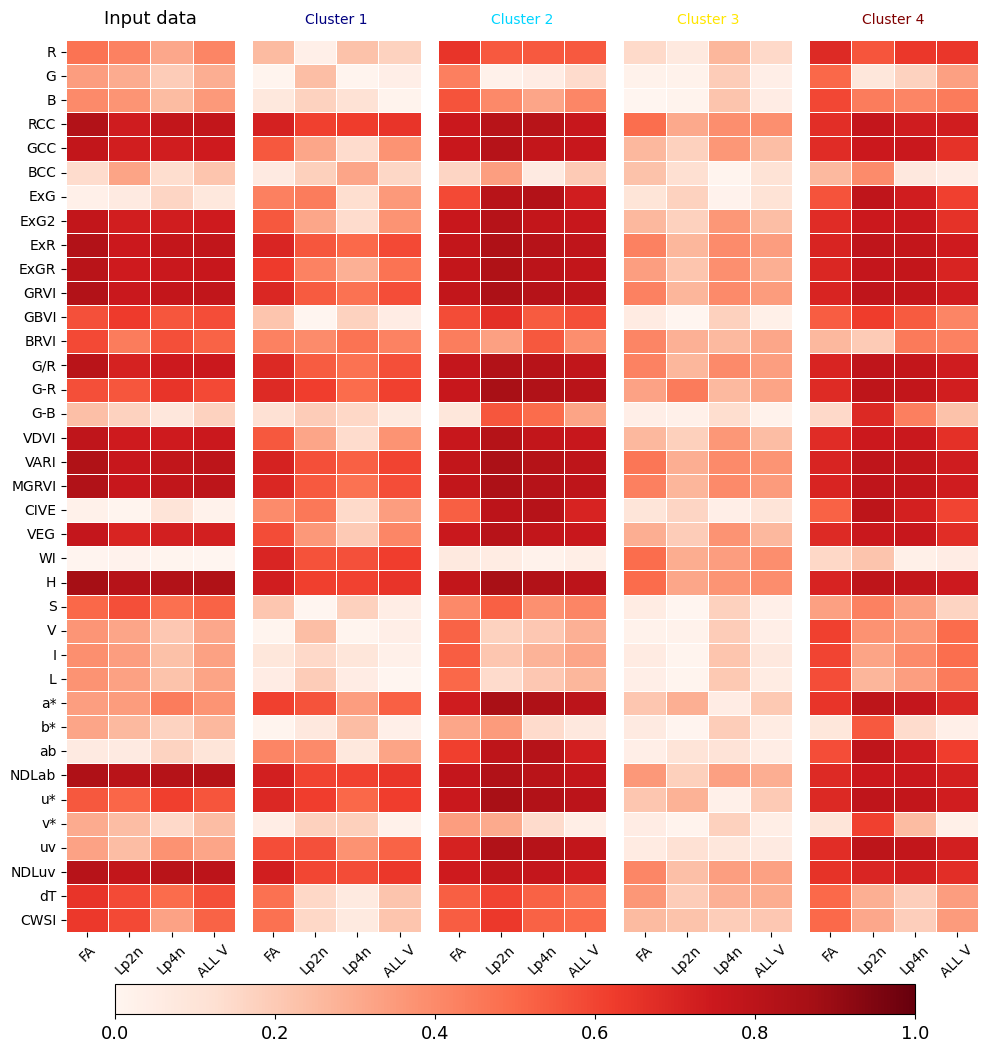

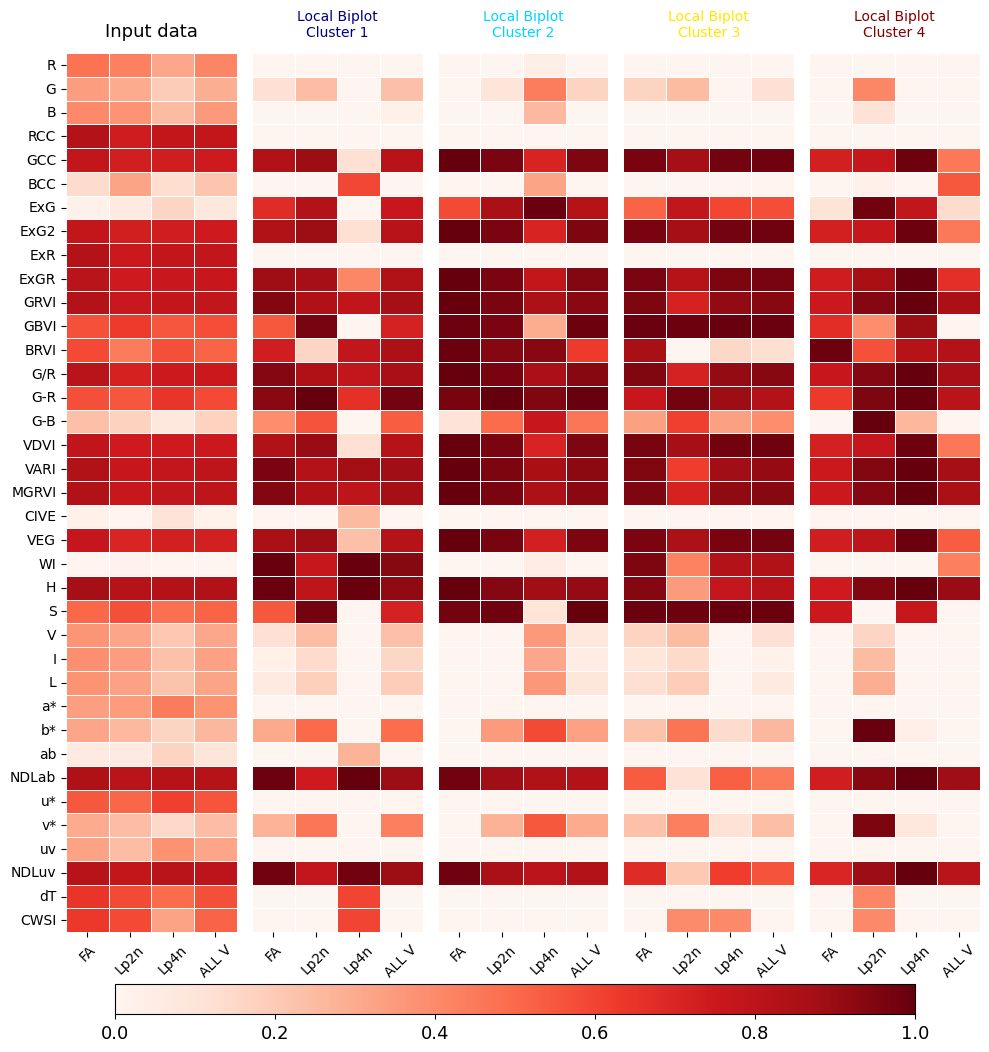

In [35]:
localbiplot.correlations_by_target(data=data,X=Xdata,y=4,loading_labels=Xdata.columns, filename='grass', key='Variety')